# Superstore sales report

## Đây là Notebook sẽ trả lời các câu hỏi dựa trên tập dữ liệu Superstore
### Các câu hỏi bao gồm:
1. Lợi nhuận và doanh số đã thay đổi như thế nào trong những năm qua?
2. Làm thế nào để Tỷ suất lợi nhuận (Lợi nhuận / Doanh số) qua các năm?
3. Lợi nhuận và doanh số thay đổi như thế nào qua các tháng trong năm 2017?
4. Tiểu bang nào có tỷ lệ hoàn vốn cao nhất?
5. Danh mục nào có tỷ lệ hoàn trả cao nhất?
6. Tháng nào trong năm có nhiều đơn đặt hàng nhất?
7. Top 10 sản phẩm bán chạy nhất?
8. Loại phụ nào thường được bán cùng nhau?

#### Clear data

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import plotly.express as px

In [2]:
# read csv data file
df = pd.read_excel('data\sample_superstore.xlsx')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df.shape

(9994, 21)

In [4]:
# show columns
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [5]:
# Check Null
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [6]:
# desceribe dataset
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
# Dropping  Row ID column and assigning to df
df = df.drop('Row ID',axis=1)
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [8]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['year'], df['month'] = df['Order Date'].dt.year, df['Order Date'].dt.month
df

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,year,month
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,...,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,2014,1
9990,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,...,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,2017,2
9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,...,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,2017,2
9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,...,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,2017,2


In [9]:
df['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

In [10]:
# Graph the data to understand sales and profit distribution from 2015-2018
new_data = pd.DataFrame(df[['Sales',  'Profit', 'year', 'month']])
new_data

,Sales,Profit,year,month
0,261.9600,41.9136,2016,11
1,731.9400,219.5820,2016,11
2,14.6200,6.8714,2016,6
3,957.5775,-383.0310,2015,10
4,22.3680,2.5164,2015,10
...,...,...,...,...
9989,25.2480,4.1028,2014,1
9990,91.9600,15.6332,2017,2
9991,258.5760,19.3932,2017,2
9992,29.6000,13.3200,2017,2


In [11]:
new_data.sort_values(by=['year', 'month'])

,Sales,Profit,year,month
592,9.344,1.1680,2014,1
593,31.200,9.7500,2014,1
716,9.940,3.0814,2014,1
739,11.784,4.2717,2014,1
740,272.736,-64.7748,2014,1
...,...,...,...,...
9767,54.900,26.9010,2017,12
9768,50.040,25.0200,2017,12
9967,40.200,18.0900,2017,12
9968,735.980,331.1910,2017,12


In [12]:
# How have profit and sales changed over the years?

change = new_data.groupby(by='year').sum()
change['rate'] = round(change['Profit']/change['Sales'], 3)
change

,Sales,Profit,month,rate
year,,,,
2014,484247.4981,49543.9741,15663,0.102
2015,470532.5090,61618.6037,16703,0.131
2016,609205.5980,81795.1743,20079,0.134
2017,733215.2552,93439.2696,25605,0.127


## 1. Lợi nhuận và doanh số đã thay đổi như thế nào trong những năm qua?

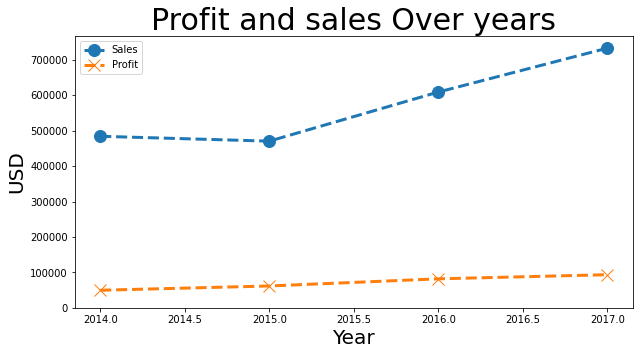

In [13]:
plt.figure(figsize=(10,5))
plt.plot(change.index, change['Sales'], marker='o', markersize=12, linewidth=3, linestyle='dashed', label='Sales')
plt.plot(change.index, change['Profit'], marker='x', markersize=12, linewidth=3, linestyle='dashed', label = 'Profit')
plt.xlabel("Year", fontsize = 20)
plt.ylabel('USD', fontsize = 20)
plt.ylim(ymin = 0)
plt.title('Profit and sales Over years', fontsize = 30)
plt.legend()
plt.show()

**Nhận xét:**

* Lợi nhuận có xu hướng tăng nhẹ qua các năm, tuy nhiên tăng không đáng kể, vẫn giữ ở mức hơn 50,000USD
* Doanh thu trong năm 2014 có xu hướng giảm nhẹ(do là năm kinh doanh đầu tiên), và tăng nhanh ở các năm tiếp theo (từ 500,000USD lên 700,000USD)

**Điều này cho thấy cửa hàng có xu hướng mở rộng, kinh doanh nhiều hơn, số lượng sản phẩm bán ra cũng nhiều hơn, tuy nhiên lợi nhuận thu về gia tăng không đáng kể**

## 2. Tỷ suất lợi nhuận (Lợi nhuận / Doanh số) qua các năm?

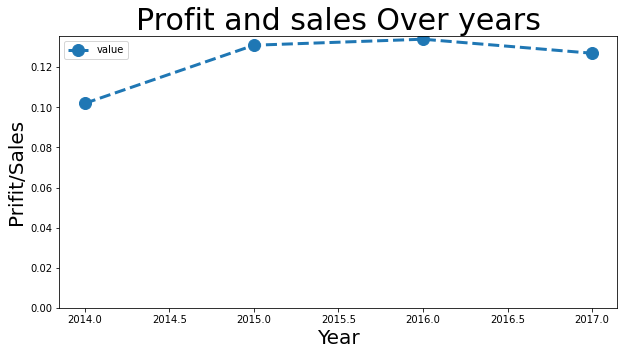

In [14]:
plt.figure(figsize=(10,5))
plt.plot(change.index, change['rate'], marker='o', markersize=12, linewidth=3, linestyle='dashed', label='value')
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Prifit/Sales', fontsize = 20)
plt.ylim(ymin = 0)
plt.title('Profit and sales Over years', fontsize = 30)
plt.legend()
plt.show()

**Nhận xét:** 
* Tỷ xuất lợi nhuận có xu hướng tăng trong năm đầu tiên 2014-2015, tăng nhẹ vào năm 2015-2016 và sa đó giảm vào năm 2016-2017
* Tỷ số giữa lợi nhuận và doanh thu luôn giữ ở mức 10% cho thấy việc kinh danh của cửa hành qua các năm khá ổn định, tuy nhiên con số này sẽ tốt hơn nhiều nếu nó tăng mạnh qua từng năm

In [15]:
chang2017 = new_data.loc[new_data['year'] == 2017].sort_values(by='month')
chang2017.head()

,Sales,Profit,year,month
733,179.970,86.3856,2017,1
732,242.940,9.7176,2017,1
1415,37.740,12.8316,2017,1
734,99.696,33.6474,2017,1
735,27.936,9.4284,2017,1


In [16]:
chang2017 = chang2017.groupby(by='month').sum()
chang2017

,Sales,Profit,year
month,,,
1,43971.3740,7140.4391,312635
2,20301.1334,1613.8720,215819
3,58872.3528,14751.8915,480046
4,36521.5361,933.2900,409451
5,44261.1102,6342.5828,488114
6,52981.7257,8223.3357,494165
7,45264.4160,6952.6212,455842
8,63120.8880,9040.9557,439706
9,87866.6520,10991.5556,925803


## 3. Lợi nhuận và doanh số thay đổi như thế nào qua các tháng trong năm 2017?

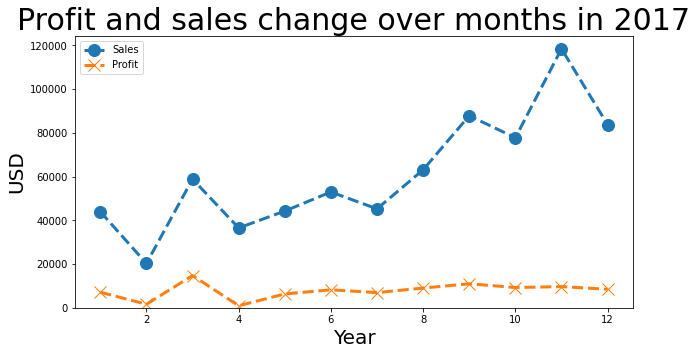

In [17]:
plt.figure(figsize=(10,5))
plt.plot(chang2017.index, chang2017['Sales'], marker='o', markersize=12, linewidth=3, linestyle='dashed', label='Sales')
plt.plot(chang2017.index, chang2017['Profit'], marker='x', markersize=12, linewidth=3, linestyle='dashed', label = 'Profit')
plt.xlabel("Year", fontsize = 20)
plt.ylabel('USD', fontsize = 20)
plt.ylim(ymin = 0)
plt.title('Profit and sales change over months in 2017', fontsize = 30)
plt.legend()
plt.show()

**Nhận xét:**

* Lợi nhuận tháng 1 đến tháng 2 năm 2017 có xu hướng giảm(10,000USD xuống 0USD) sau đó tăng mạnh vào tháng 3(từ 0USD lên ~20,000USD). Từ tháng 5 đến tháng 12 thì lợi nhuận giữ đều ở mức 10,000USD. Theo như đồ thị thì lợi nhuận của cửa hàng qua các tháng khá ổn định từ tháng 5 trở đi.

* Doanh thu qua các tháng có sự khác biệt rõ rệt tuy nhiên có xu hướng tăng dần sau các tháng. Doanh thu cao nhất đạt 120,00USD vào tháng 11 và thấp nhất đạt 200,000 vào tháng 2

**Dựa vào đồ thị thì ta có thể thấy được mối quan hệ giữa lợi nhuận và doanh thu. Có thể thấy một bất cập là doanh thu tăng khá cao vào các tháng cuối năm tuy nhiên lợi nhuận vẫn không đổi.**

In [18]:
state = df.groupby(by = df['State']).sum()
state.head()

,Postal Code,Sales,Quantity,Discount,Profit,year,month
State,,,,,,,
Alabama,2195669,19510.6400,256,0.0,5786.8253,122953,477
Arizona,19102126,35282.0010,862,68.0,-3427.9246,451495,1798
Arkansas,4339309,11678.1300,240,0.0,4008.6871,120941,463
California,184382639,457687.6315,7667,145.6,76381.3871,4033452,15902
Colorado,14613828,32108.1180,693,57.6,-6527.8579,366875,1586


In [19]:
state['rates'] = round(state['Profit']/(state['Sales']-state['Profit']),3) 
state.head()

,Postal Code,Sales,Quantity,Discount,Profit,year,month,rates
State,,,,,,,,
Alabama,2195669,19510.6400,256,0.0,5786.8253,122953,477,0.422
Arizona,19102126,35282.0010,862,68.0,-3427.9246,451495,1798,-0.089
Arkansas,4339309,11678.1300,240,0.0,4008.6871,120941,463,0.523
California,184382639,457687.6315,7667,145.6,76381.3871,4033452,15902,0.200
Colorado,14613828,32108.1180,693,57.6,-6527.8579,366875,1586,-0.169


## 4. Tiểu bang nào có tỷ lệ hoàn vốn cao nhất?

In [20]:
top10 = state.sort_values('rates', ascending = False)[:15]
top10
fig = px.scatter(top10,
                x = top10.index,
                y = 'rates',
                size = None,
                color = top10.index,
                template = 'xgridoff',
                animation_frame = None,
                title = 'Top 15 States have the highest return rates')
fig.show()

**Nhận xét:** Ta có công thức tính tỷ lệ hồi vốn = Lợi nhuận / Doanh thu. Thông số này càng lớn cho thấy mức độ hồi vốn càng cao.

* Tiểu bang có tỷ lệ hồi vốn cao nhất là Dictrict of Columbia

* Tiểu bang có tỷ lệ hồi vốn đứng thứ 15 là Mississippi

**Cửa hàng nên tăng cường kinh doanh hơn ở các tiêu bang trên để có thể tăng thêm doanh thu và lợi nhuận**

In [21]:
Category = df.groupby(by = df['Category']).sum()
Category['rates'] = round(Category['Profit']/(Category['Sales']-Category['Profit']),3) 
Category.head()

,Postal Code,Sales,Quantity,Discount,Profit,year,month,rates
Category,,,,,,,,
Furniture,118196026,741999.7953,8028,368.89,18451.2728,4275328,16792,0.026
Office Supplies,330772872,719047.0320,22906,947.80,122490.8008,12146743,46874,0.205
Technology,102603754,836154.0330,6939,244.40,145454.9481,3723057,14384,0.211


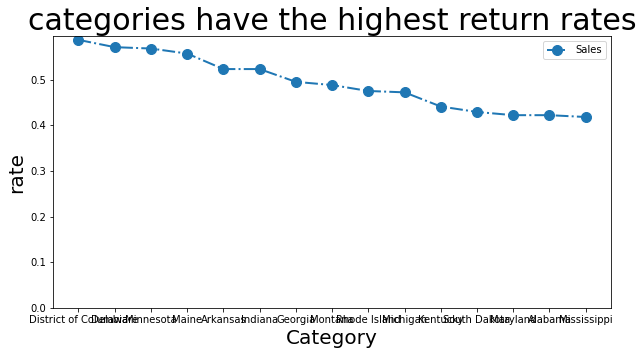

In [22]:
plt.figure(figsize=(10,5))
plt.plot(top10.index, top10['rates'], marker='o', markersize=10, linestyle='-.', linewidth=2, label='Sales')
plt.xlabel("Category", fontsize = 20)
plt.ylabel('rate', fontsize = 20)
plt.ylim(ymin = 0)
plt.title('categories have the highest return rates', fontsize = 30)
plt.legend()
plt.show()

In [23]:
Category

,Postal Code,Sales,Quantity,Discount,Profit,year,month,rates
Category,,,,,,,,
Furniture,118196026,741999.7953,8028,368.89,18451.2728,4275328,16792,0.026
Office Supplies,330772872,719047.0320,22906,947.80,122490.8008,12146743,46874,0.205
Technology,102603754,836154.0330,6939,244.40,145454.9481,3723057,14384,0.211


## 5. Danh mục nào có tỷ lệ hoàn trả cao nhất?

In [24]:
Category = df.groupby(['Category', 'Sub-Category'])[['Sales','Profit']].mean().reset_index()

Category['cost'] = Category['Sales'] - Category['Profit']

Category['return_rate'] = round((Category['Sales'] - Category['cost']) / Category['cost'], 3)

cate = Category.sort_values('return_rate', ascending = 0)

fig = px.scatter(cate,
                x = 'Sub-Category',
                y = 'return_rate',
                size = None,
                color = 'Sub-Category',
                template = 'xgridoff',
                animation_frame = None,
                title = "Category have highest Return_rate")
fig.show()

**Nhận xét:** Đa số các mặt hàng có tỷ lệ hoàn vốn dương cho thấy việc kinh doanh các mặt hàng trên là không lỗ vốn. Mặt hàng nên được ưu tiên kinh doanh nhiều hơn là Label và Paper, các mặt hàng nên giảm tải và ngừng kinh doanh là "storage" và "Chair"

In [25]:
data_order = pd.DataFrame(df[['Order ID', 'year', 'month']])
data_order.sort_values(by=['month', 'year'])

,Order ID,year,month
592,CA-2014-135405,2014,1
593,CA-2014-135405,2014,1
716,CA-2014-130092,2014,1
739,CA-2014-112326,2014,1
740,CA-2014-112326,2014,1
...,...,...,...
9767,CA-2017-102659,2017,12
9768,CA-2017-142328,2017,12
9967,CA-2017-153871,2017,12
9968,CA-2017-153871,2017,12


In [26]:
data_order = df.groupby(['year', 'month']).count()['Order ID']
data_order

year  month
2014  1         79
      2         46
      3        157
      4        135
      5        122
      6        135
      7        143
      8        153
      9        268
      10       159
      11       318
      12       278
2015  1         58
      2         64
      3        138
      4        160
      5        146
      6        138
      7        140
      8        159
      9        293
      10       166
      11       324
      12       316
2016  1         89
      2         83
      3        163
      4        170
      5        225
      6        199
      7        201
      8        176
      9        363
      10       196
      11       370
      12       352
2017  1        155
      2        107
      3        238
      4        203
      5        242
      6        245
      7        226
      8        218
      9        459
      10       298
      11       459
      12       462
Name: Order ID, dtype: int64

In [27]:
years = data_order.index.get_level_values('year').unique().astype(str)
months = data_order.index.get_level_values('month').unique().astype(str)


In [28]:
years

Index(['2014', '2015', '2016', '2017'], dtype='object', name='year')

In [29]:
months

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'], dtype='object', name='month')

## 6. Tháng nào trong năm có nhiều đơn đặt hàng nhất?

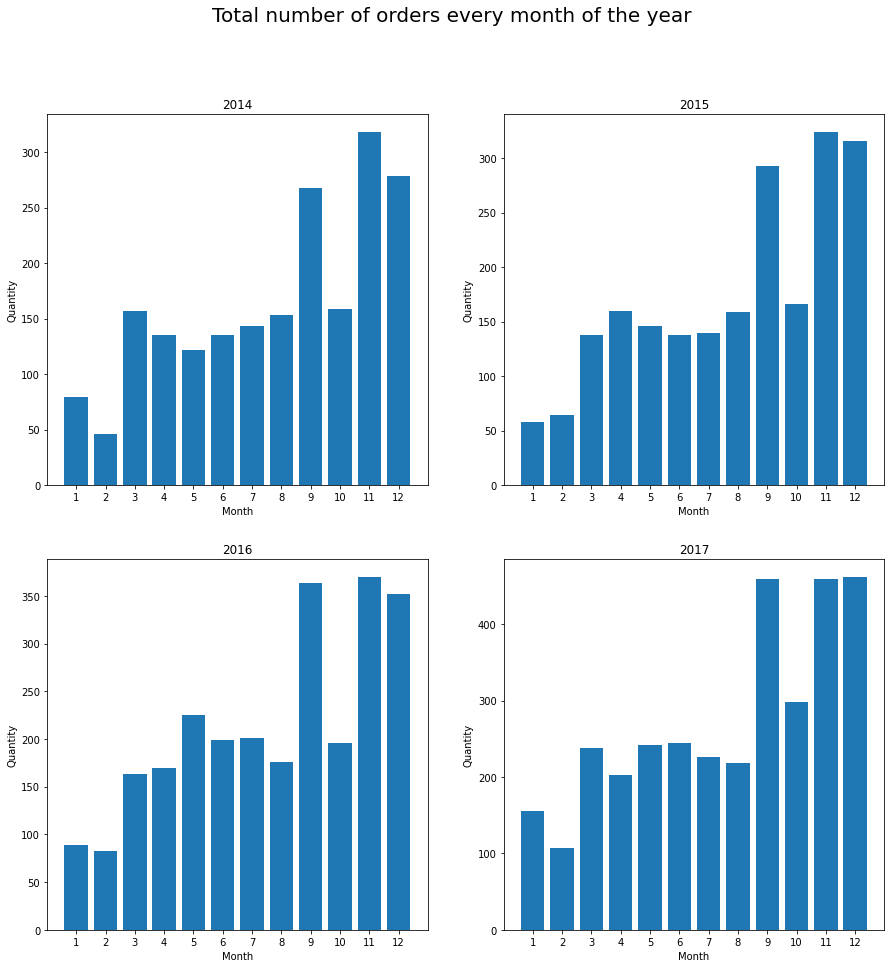

In [30]:
fig = plt.figure(figsize=(15,15))
for i, year in enumerate(years):
    ax = fig.add_subplot(2,2,i+1)
    ax.bar(months, data_order[data_order.index.get_level_values('year')==int(years[i])])
    ax.set_title(years[i])
    ax.set_xlabel('Month')
    ax.set_ylabel('Quantity')
fig.suptitle('Total number of orders every month of the year',fontsize=20)
plt.show()

**Nhận xét:**
* Tháng có nhiều đơn đặt hàng nhất trong năm là các tháng 9,11 và 12. Đây là những tháng có các đơn đặt hàng nhiều trong cả 4 năm đang xét. Điều này cho thấy các mặt hàng của cửa hàng phù hợp với nhu cầu mua sắm vào cuối năm hơn.

In [31]:
best_selling = df.groupby('Product Name')['Quantity'].sum().reset_index()
best_selling = best_selling.sort_values('Quantity', ascending = 0).head(10)
best_selling.iloc[:10, :]

,Product Name,Quantity
1499,Staples,215
1493,Staple envelope,170
537,Easy-staple paper,150
1500,Staples in misc. colors,86
942,KI Adjustable-Height Table,74
259,Avery Non-Stick Binders,71
1511,Storex Dura Pro Binders,71
699,GBC Premium Transparent Covers with Diagonal L...,67
1450,"Situations Contoured Folding Chairs, 4/Set",64
1497,Staple-based wall hangings,62


In [32]:
data_frame_best_sell = df[["Product ID", "Category", "Sub-Category", 
                                   "Product Name", "Quantity"]].groupby(by=["Product ID", 
                                                                            "Category", "Sub-Category", 
                                                                            "Product Name"]).sum().reset_index()
data_frame_best_sell = data_frame_best_sell.sort_values(by = 'Quantity').tail(10)
data_frame_best_sell

,Product ID,Category,Sub-Category,Product Name,Quantity
123,FUR-CH-10004287,Furniture,Chairs,SAFCO Arco Folding Chair,53
1239,OFF-PA-10003441,Office Supplies,Paper,Xerox 226,53
99,FUR-CH-10002880,Furniture,Chairs,"Global High-Back Leather Tilter, Burgundy",54
1376,OFF-ST-10001809,Office Supplies,Storage,Fellowes Officeware Wire Shelving,55
1573,TEC-AC-10003038,Technology,Accessories,Kingston Digital DataTraveler 16GB USB 2.0,57
848,OFF-BI-10004728,Office Supplies,Binders,Wilson Jones Turn Tabs Binder Tool for Ring Bi...,59
112,FUR-CH-10003774,Furniture,Chairs,"Global Wood Trimmed Manager's Task Chair, Khaki",59
333,FUR-TA-10001095,Furniture,Tables,Chromcraft Round Conference Tables,61
95,FUR-CH-10002647,Furniture,Chairs,"Situations Contoured Folding Chairs, 4/Set",64
704,OFF-BI-10001524,Office Supplies,Binders,GBC Premium Transparent Covers with Diagonal L...,67


## 7. Top 10 sản phẩm bán chạy nhất?

In [33]:
top10 = data_frame_best_sell.sort_values('Quantity', ascending = False)[:10]
fig = px.scatter(top10,
                y="Quantity", 
                x="Product Name",
                size = 'Quantity',
                color = 'Product ID',
                template = 'xgridoff',
                title = '"Top 10 best-selling products"')
fig.show()

**Nhận xét:** Top 10 mặt hàng bán chạy nhất được thể hiện trên đồ thị. Với biểu đồ này, cửa hàng nên forcus vào các mặt hàng này nhiều hơn, hoặc có thể kinh doanh thêm các mặt hàng tương tự để tăng thêm doanh thu và lời nhuận.
